# Часть 1

##### Проведите иерархический кластерный анализ данных с использованием не менее 4-х переменных (кроме name и grade). Приведите подтверждение, что выбранные переменные могут быть использованы для кластеризации.

## 1. Выберите оптимальный алгоритм кластеризации и обоснуйте свой выбор.

#### Для решения задачи был выбран алгоритм кластеризации Уорда (Ward’s Method).

##### Данный метод минимизирует разброс данных внутри кластеров, что приводит к созданию компактных и однородных групп. Этот метод идеально подходит, когда важно, чтобы точки внутри одного кластера были максимально похожи друг на друга. Он устойчив к выбросам и часто приводит к сбалансированным кластерам.

## 2. Создайте дендрограмму, опишите её.

### Код

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown # Для удобного отображения
from itertools import combinations # Для подбора комбинаций

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import calinski_harabasz_score


In [2]:
df = pd.read_excel("C:/Users/daria/Downloads/gmu.xlsx")
df

,name,grade,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8
0,Министерство внутренних дел Российской Федерац,83.3,70.9,94.5,89.5,81.3,97.2,71.0,40.4,100.0
1,Федеральная миграционная служба,82.1,74.8,71.8,93.8,100.0,97.7,98.0,63.7,100.0
2,Федеральное казначейство,81.3,84.6,66.9,90.1,100.0,100.0,99.6,64.6,60.9
3,Федеральная таможенная служба,78.6,73.5,65.0,98.9,100.0,100.0,73.4,55.1,100.0
4,Федеральная налоговая служба,78.6,69.8,73.5,99.7,100.0,100.0,33.7,59.5,100.0
...,...,...,...,...,...,...,...,...,...,...
74,Федеральное агентство морского и речного транс�,47.9,43.2,35.1,50.3,56.3,95.6,25.5,0.0,100.0
75,Федеральное космическое агентство,46.2,39.1,47.2,92.9,37.5,36.3,44.0,0.0,100.0
76,Федеральное агентство специального строительс�,44.2,50.0,28.7,25.8,25.0,47.5,100.0,58.0,100.0
77,Министерство экономического развития Российск�,43.8,41.7,46.3,37.5,56.3,38.7,44.0,51.5,25.0


In [3]:
# Словарь для расшифровки наименований колонок
index_dict = {
"ind1" : "Среднесрочное финансовое планирование",
"ind2" : "Исполнение бюджета в части расходов",
"ind3" : "Исполнение бюджета по доходам",
"ind4" : "Учет и отчетность",
"ind5" : "Контроль и аудит",
"ind6" : "Исполнение судебных актов",
"ind7" : "Кадровый потенциал",
"ind8" : "Управление активами"
}

In [4]:
df = df.rename(columns=index_dict) # Переименуем колонки

In [5]:
#Массив с наименованиями колонок (только индексы, без name и grade)
columns_names  = df.columns[2:len(df)]

#Аналогичный предыдущему массив только для новых колонок (стандартизируем далее их)
columns_names_z = []
for i in columns_names:
    columns_names_z.append(i + "_z")

df_x = df[columns_names] # Создадим новый фрейм с колонками, которые необходимо стандартизировать

df[columns_names_z] = (df_x-df_x.mean())/df_x. std() # Стандартизируем все колонки

In [6]:
# Для анализа возьмем 4 переменных
my_list = ['Среднесрочное финансовое планирование', 'Исполнение бюджета в части расходов', 'Учет и отчетность', 'Контроль и аудит']

### Дендрограмма
#### Рассмотрим комбинацию колонок 'Среднесрочное финансовое планирование', 'Исполнение бюджета в части расходов', 'Учет и отчетность', 'Контроль и аудит'

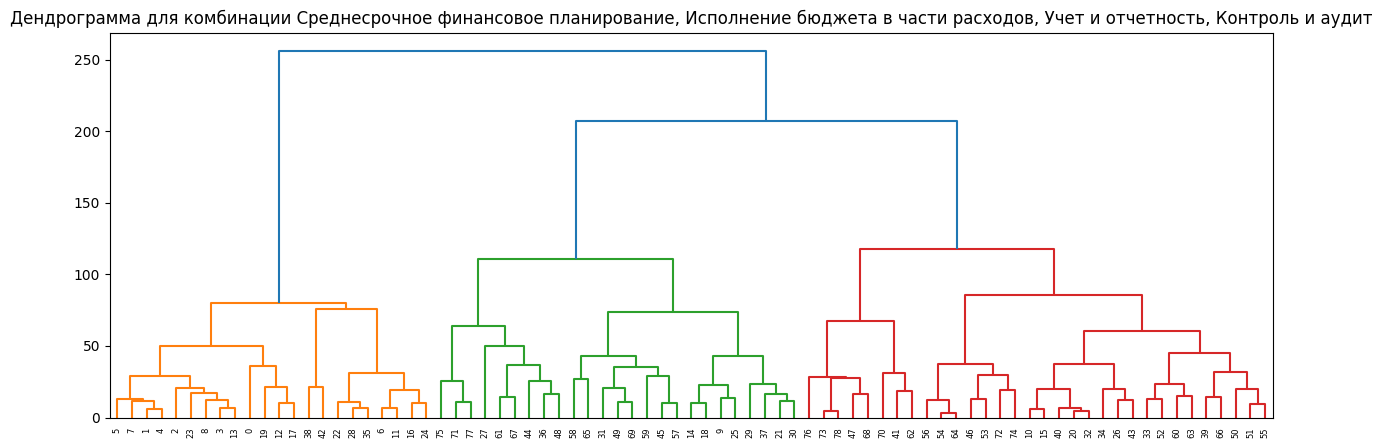

In [82]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df[my_list], 'ward'))
plt.title(f"Дендрограмма для комбинации {', '.join(map(str, my_list))}")
plt.show()

### Описание полученной дендрограммы:

На представленной дендрограмме можно увидеть три основных кластера, каждый из которых выделен определенным цветом:

<span style='color:Orange'>Оранжевый кластер </span> - охватывает примерно 1/3 часть дендрограммы, начиная с левого края. Этот кластер имеет множество разветвлений, что может указывать на сложность и разнообразие элементов в кластере.

<span style='color:Green'>Зеленый кластер </span>- занимает следующую, после оранжевой, часть дендрограммы, примерно треть графика. Выглядит менее сложным, чем оранжевый кластер, с меньшим количеством подразделений.

<span style='color:Red'>Красный кластер </span>- находится в правой части дендрограммы, занимая последнюю 1/3 часть графика (даже, как можно заметить, больше трети). Этот кластер также демонстрирует значительное разнообразие с множеством подразделений.

## 3. Определите число кластеров, объясните своё решение.

### Объяснение

Выбор количества кластеров осуществим на основе значений Индекса Калински-Харабаша. Данный индекс учитывает плотность внутри кластеров, а также разброс между кластерами. Фактически, это приводит к балансу, который позволяет получить "компактные" и "четкие" кластеры.

Он рассчитывается как соотношение общего разброса объектов между кластерами и внутри их. Оптимальным считается число кластеров, при котором значение индекса максимально.

### Код и полученное значение

In [7]:
Z = linkage(df[my_list], method='ward', metric='euclidean') 
calinski_harabasz_score_values = {}

for k in range (2, 40):
    labels = fcluster(Z, t=k, criterion='maxclust')
    calinski_harabasz_score_values[k] = calinski_harabasz_score(df[my_list], labels)

clusters_number = max(calinski_harabasz_score_values, key=calinski_harabasz_score_values.get)
display(Markdown(f"### <b>Из рассчитанного Индекса Калински-Харабаша получаем оптимальное количество кластеров, равное {clusters_number}, и выбираем данное значение в качестве основного"))


### <b>Из рассчитанного Индекса Калински-Харабаша получаем оптимальное количество кластеров, равное 3, и выбираем данное значение в качестве основного

### Добавим в наш датасет колонку с принадлежностью к кластеру

In [8]:
labels = fcluster(Z, t=clusters_number, criterion='maxclust')
df['culster_labels'] = labels
df.head(5)

,name,grade,Среднесрочное финансовое планирование,Исполнение бюджета в части расходов,Исполнение бюджета по доходам,Учет и отчетность,Контроль и аудит,Исполнение судебных актов,Кадровый потенциал,Управление активами,Среднесрочное финансовое планирование_z,Исполнение бюджета в части расходов_z,Исполнение бюджета по доходам_z,Учет и отчетность_z,Контроль и аудит_z,Исполнение судебных актов_z,Кадровый потенциал_z,Управление активами_z,culster_labels
0,Министерство внутренних дел Российской Федерац,83.3,70.9,94.5,89.5,81.3,97.2,71.0,40.4,100.0,0.987256,2.971888,0.917105,0.547476,1.019135,-0.279571,-0.433371,0.611107,1
1,Федеральная миграционная служба,82.1,74.8,71.8,93.8,100.0,97.7,98.0,63.7,100.0,1.286669,1.212633,1.128905,1.361800,1.042180,0.893604,0.792669,0.611107,1
2,Федеральное казначейство,81.3,84.6,66.9,90.1,100.0,100.0,99.6,64.6,60.9,2.039039,0.832882,0.946659,1.361800,1.148183,0.963126,0.840026,-0.911071,1
3,Федеральная таможенная служба,78.6,73.5,65.0,98.9,100.0,100.0,73.4,55.1,100.0,1.186864,0.685632,1.380110,1.361800,1.148183,-0.175289,0.340139,0.611107,1
4,Федеральная налоговая служба,78.6,69.8,73.5,99.7,100.0,100.0,33.7,59.5,100.0,0.902806,1.344384,1.419514,1.361800,1.148183,-1.900291,0.571666,0.611107,1


## 4. Опишите получившиеся кластеры на основе описательной статистки.

### Значения описательной статистики

#### Среднее значение и медиана по каждому кластеру

In [9]:
aggregated_stats = df.groupby('culster_labels')[my_list].agg(['mean', 'median'])
aggregated_stats

Среднесрочное финансовое планирование         \
                                                mean median   
culster_labels                                                
1                                          66.022727  68.15   
2                                          56.684000  56.90   
3                                          53.612500  53.00   

               Исполнение бюджета в части расходов        Учет и отчетность  \
                                              mean median              mean   
culster_labels                                                                
1                                        62.936364  66.30         95.750000   
2                                        56.576000  58.50         70.780000   
3                                        51.159375  53.85         48.546875   

                      Контроль и аудит         
               median             mean median  
culster_labels                                 
1               100.0        90.440909  95.60  
2                62.5        51.492000  55.00  
3                53.1        82.965625  85.95

#### Количество значений в каждом кластере

In [10]:
display(HTML(df['culster_labels'].value_counts().reset_index().to_html(index=False)))

culster_labels,count
3,32
2,25
1,22


### Вывод по описательной статистике

<b> На основании данных о среднем и медиане по каждому кластеру, можно сделать следующие выводы: </b>

<b> Кластер 1 </b> - в данном кластере находятся самые высокие значения среднего и медианы (среди представленных) по всем рассматриваемым характеристикам;

<b> Кластер 2 </b> - в данном кластере находятся самые высокие значения среднего и медианы (за исключением первого кластера) по следующим переменным: среднесрочное финансовое планирование, исполнение бюджета в части расходов, учет и отчетность. Однако, показатель котроля и аудита ниже, чем в третьем кластере.

<b> Кластер 3 </b> - в данном кластере средние значения и медианы по всем показателям ниже, чем в других кластерах, за исключением контроля и аудита, который выше чем, у кластера 2, но ниже, чем у кластера 1.

<b> На основании количества объектов в каждом кластере можно сказать, что они распределились практически равномерно (что учитывал Индекс Калински-Харабаша), однако к третьему кластеру отнесено больше объектов, чем к остальным. </b>

## 5. Дайте названия кластерам и обоснуйте их.

Кластер 1 <b> (Лидеры) </b>: Данный кластер включает государственные органы с высоким уровнем компетентности по всем выбранным для анализа параметрам. Они показывают наилучшие результаты, при осуществлении деятельности, связанной с планированием и исполнением бюджета, отчетностью и контролем. Например, Казначейство России, ФСИН России, МВД России, Следственный комитет России и другие.

Кластер 2 <b> (Исполнители) </b>: Государственные органы в данном кластере имеют сравнительно хорошие показатели по среднесрочному планированию и исполнению бюджета, но их деятельность по осуществлению контроля и аудита не является эффективной. Они эффективны в непосредственной финансовой деятельности, но нуждаются в улучшении надзорных функций. Например, ФССП России, Минэкономразвития России, Минстрой России, Росстат России и другие.

Кластер 3 <b> (Развивающиеся государственные органы) </b>: Данные государственные органы показывают достаточно низкие результаты по всем рассматриваемым параметрам, что говорит о наличии потенциала для развития и улучшения. Их слабые позиции в управлении бюджетом и осуществлении контроля требуют особого внимания и реализации дополнительных мер для повышения эффективности. Например, Минфин России, Счетная палата России, Минюст России, Гоусдарственная Дума и другие.

## 6. Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?

Изначально мы думали, что если кластеризовать российские государственные органы по четырём признакам — «Среднесрочное финансовое планирование», «Исполнение бюджета в части расходов», «Учет и отчетность», «Контроль и аудит», то можно предположить, что кластеры будут основаны на уровне развития этих функций, их интеграции и эффективности в различных государственных учреждениях. Например:

1. Продвинутые финансовые институты (высокий уровень по всем показателям).
Это государственные органы, которые демонстрируют высокий уровень во всех четырёх направлениях. Они обладают хорошо отлаженными системами финансового планирования, контроля, аудита и отчетности. Например, Минфин России.

2. Среднеразвитые государственные органы (высокий или средний уровень по отдельным функциям, но низкий в других).
В данный кластер могут входить ведомства, у которых есть сильные стороны в отдельных аспектах, но в других они работают менее эффективно. Например, может быть высокий уровень исполнения бюджета по расходам с менее эффективным аудитом и отчестностью. Например, Минтранс России.

3. Сильные в исполнении бюджета, но слабые в отчетности и аудите государственные органы.
К такой категории можно отнести госудрственные органы, которые хорошо справляются с исполнением бюджета и финансовым планированием, но недостаточно хорошо организованы в части учёта, отчетности и аудита. Например, Минтруд России.

4. Сильные в контроле и аудите, но слабые в финансовом планировании.
Данные государственные органы органы могут эффективно осуществлять контроль и аудит, но при этом испытывать трудности с долгосрочным финансовым планированием и исполнением бюджета. Например, ФНС России.


Примерно такая кластеризация и получилась, мы имеем:

<b> Кластер 1 - Лидеры = предполагаемый кластер "Продвинутые финансовые институты". </b>
Однако, предполагаемый нами Минфин России в этот кластер не попал, он попал в третий кластер.

<b> Кластер 2 - Исполнители = предполагаемый кластер "Технически сильные, но слабые в отчетности и аудите".  </b>
Мы предполагали, что в данный кластер попадет Минтруд России, однако он попал в первый кластер.

<b> Кластер 3 - Развивающиеся госорганы = предполагаемый кластер "Среднеразвитые органы". </b>
Рассмотренные показатели, к сожалению, в данных государственных органах имеют самые низкие средние и медианные значения. Предполагаемый нами Минтранс России оказался именно в этом кластере.

<b> Четвертый кластер "Сильные в контроле и аудите, но слабые в планировании" </b>, который, как мы предполагали, будет наиболее эффективен в аудите, но слаб в финансовом планировании, в ходе анализа выделен не был. 

# Часть 2

##### Проведите кластерный анализ по методу k-средних с использованием не менее 4-х метрических переменных. Приведите подтверждение, что выбранные переменные могут быть использованы для кластеризации.

## 1. Определите число кластеров, объясните своё решение.

### Объяснение

Выбор количества кластеров осуществим на основе значений Индекса Калински-Харабаша. Данный индекс учитывает плотность внутри кластеров, а также разброс между кластерами. Фактически, это приводит к балансу, который позволяет получить "компактные" и "четкие" кластеры.

Он рассчитывается как соотношение общего разброса объектов между кластерами и внутри их. Оптимальным считается число кластеров, при котором значение индекса максимально.

### Код

In [8]:
from sklearn.cluster import KMeans

In [9]:
df = pd.read_excel("C:/Users/daria/Downloads/WIPO-GII_2022.xlsx")

In [10]:
# Оставим в датасете данные только за 2020 год (Алиса Валерьевна на паре сказала, что нам нужно работать только с ними)
df = df.drop(columns=[col for col in df.columns if col.endswith('_2021') or col.endswith('_2022')]) 

In [5]:
from itertools import combinations

df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()

columns = df_numeric.columns
combinations_of_columns = list(combinations(columns, 4)) # Генерируем 4 неповторяющиеся комбинации

def check_correlation_below_threshold(cols, corr_matrix, threshold=0.75): # Функция для проверки, есть ли в матрице корреляций значения выше 0,75 
    for col1, col2 in combinations(cols, 2):
        if abs(corr_matrix.loc[col1, col2]) >= threshold:
            return False
    return True

valid_combination = [] # Список всех возможных комбинаций по 4 переменных
for comb in combinations_of_columns:
    if check_correlation_below_threshold(comb, corr_matrix):
        valid_combination.append(list(comb))


In [6]:
len(valid_combination)

191930

### Выбор переменных

In [11]:
# Так как у нас получилось большое количество подходящих комбинаций, возьмем для выполнения данной работы одну случайную комбинацию
# Было сгенерировано через библиотеку "random", но мы зафиксировали полученное значение
my_list = ["Business environment_2020", "Business sophistication index_2020", "Ease of getting credit_2020", "Market sophistication index_2020"]

In [9]:
display(Markdown(f"### Рассмотрим комбинацию из 4 колонок: {', '.join(map(str, my_list))}"))

### Рассмотрим комбинацию из 4 колонок: Business environment_2020, Business sophistication index_2020, Ease of getting credit_2020, Market sophistication index_2020

### Матрица корреляций для этих колонок:

In [14]:
display(HTML(df[my_list].corr().to_html()))

,Business environment_2020,Business sophistication index_2020,Ease of getting credit_2020,Market sophistication index_2020
Business environment_2020,1.000000,0.645183,0.300924,0.612061
Business sophistication index_2020,0.645183,1.000000,0.119349,0.680695
Ease of getting credit_2020,0.300924,0.119349,1.000000,0.506339
Market sophistication index_2020,0.612061,0.680695,0.506339,1.000000


Как мы видим, между столбцами корреляция ниже 0.75, значит можно использовать k-means кластеризацию

### Поиск числа кластеров через Индекс Калински-Харабаша

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Объявим массив только для новых колонок
columns_names_z = []
for j in my_list:
    columns_names_z.append(j + "_z")

df_x = df[my_list]
df[columns_names_z] = (df_x-df_x.mean())/df_x. std() # Стандартизируем все колонки
    
df_new = df[["Country"] + columns_names_z + my_list] # Создадим новый датасет с наименование стран (строк), выбранными 4 колонками и их стандартизированными значениями
df_new = df_new.dropna() # Удалим нулевые значения, если они там есть

    
X = df_new[columns_names_z]
calinski_harabasz_score_values = {}
# Рассчитаем Индекс Калински-Харабаша для 40 кластеров
for k in range (2, 40): 
    labels = KMeans(n_clusters=k).fit_predict(X)
    calinski_harabasz_score_values[k] = calinski_harabasz_score(X, labels)

clusters_number = max(calinski_harabasz_score_values, key=calinski_harabasz_score_values.get)
display(Markdown(f"### Из рассчитанного Индекса Калински-Харабаша получаем <b> оптимальное количество кластеров, равное {clusters_number}, </b> и выбираем данное значение в качестве основного"))

### Из рассчитанного Индекса Калински-Харабаша получаем <b> оптимальное количество кластеров, равное 3, </b> и выбираем данное значение в качестве основного

## 2. Опишите получившиеся кластеры с помощью описательной статистки.

### Определяем принадлежность к кластеру

In [15]:
kmeans_model = KMeans(n_clusters=clusters_number).fit_predict(X) # Оставляем то количество кластеров, при котором индекс достигает максимального значения

df_new['Clusters'] = kmeans_model # Добавляем колонку с принадлежностью к кластеру
df_new.head(5)

,Country,Business environment_2020_z,Business sophistication index_2020_z,Ease of getting credit_2020_z,Market sophistication index_2020_z,Business environment_2020,Business sophistication index_2020,Ease of getting credit_2020,Market sophistication index_2020,Clusters
0,Cote d'Ivoire,0.027187,-0.777855,0.341496,-0.496051,70.8,19.7,70.0,42.6,1
1,Czechia,0.880275,1.123112,0.341496,0.266025,81.1,46.2,70.0,51.1,0
2,"Egypt, Arab Rep.",-0.453193,-0.849590,0.097037,-0.791915,65.0,18.7,65.0,39.3,2
3,"Hong Kong SAR, China",0.946534,1.065724,0.585955,3.439846,81.9,45.4,75.0,86.5,0
4,"Iran, Islamic Rep.",-1.579601,-0.906977,-0.636340,-0.836743,51.4,17.9,50.0,38.8,2


### Количество значений в каждом полученном кластере:

In [16]:
display(HTML(df_new['Clusters'].value_counts().reset_index().to_html(index=False))) # Подсчитываем, сколько значений в каждом кластере

Clusters,count
1,53
2,44
0,34


### Среднее значение и медиана по каждому кластеру

In [17]:
df_new.groupby('Clusters')[my_list].agg(['mean', 'median']) # Смотрим среднее значения по каждому кластеру

Business environment_2020        Business sophistication index_2020  \
                              mean median                               mean   
Clusters                                                                       
0                        84.152941  85.90                          50.197059   
1                        70.064151  71.50                          25.060377   
2                        60.390909  61.65                          21.961364   

                Ease of getting credit_2020         \
         median                        mean median   
Clusters                                             
0         51.05                   64.558824   65.0   
1         24.30                   78.018868   80.0   
2         20.50                   43.750000   45.0   

         Market sophistication index_2020         
                                     mean median  
Clusters                                          
0                               60.261765   57.9  
1                               48.349057   48.4  
2                               38.500000   39.2

### Вывод по описательной статистике

Как мы видим, количество значений для каждого кластера распределилось неравномерно. В нулевой кластер попало 34 зачения, в первый кластер попало 53 значения, а во второй кластер попало 44 значения. Разница между минимальным и максимальным количеством значенией в кластерах равняется 10, что для небольшой выборки является довольно-таки существенным.

По значениям среднего и медианы можно отметить следующее:

<b> Кластер 0 </b> - По полученным данным мы видим, что в данном кластере наблюдаются самые высокие средние и медианные значения по всем рассматрвиаемым показателям, за исключением легкости получения кредита.

<b> Кластер 1 </b> - Все рассматриваемые средние и медианные показатели ниже, чем у нулевого кластера, однакого среднее и медиана по легкости получения кредита в данном кластере выше, чем в предыдущем.

<b> Кластер 2 </b> - В данном кластере все показатели имеют самые низкие значения среднего и медианы.

## 3. Дайте названия кластерам и обоснуйте их.

<b> Кластер 0: Лидирующие инноваторы. </b>
Данный кластер объединяет страны с высокими показателями по всем категориям, демонстрирующие лидерство в инновациях и бизнес-среде, что свидетельствует о высоком уровне экономического и инновационного развития. Например, ОАЭ, Китай, Испания, Канада и другие.

<b> Кластер 1: Стремящиеся инноваторы. </b>
Страны данного кластера демонстрируют средние показатели, но выделяется один высокий показатель в легкости получении кредитов, указывающий на их стремление к улучшению инновационного потенциала. Страны данного кластера, вероятно, активно развивают свои инновационные способности, но пока не достигли уровня нулевого кластера. Например, Россия, Турция, Грузия, Мексика и другие.

<b> Кластер 2: Начинающие инноваторы. </b>
В данном кластере находятся страны с начальными показателями инновационной деятельности, которые активно развиваются, но в настоящее время находятся на ранних этапах развития. Рассматриваемый кластер включает страны с низким уровнем развития в области бизнеса и инноваций. Например, Тунис, Оман, Беларусь, Аргентина и другие.

## 4. Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?

Изначально мы предполагали, что  на основе показателей, используемых в Глобальном инновационном индексе (таких как бизнес-среда, индекс развития бизнеса, простота получения кредита и индекс развития рынка), страны разделятся на следующие кластеры:

<b> 1) Страны-лидеры. </b> Данные страны обычно имеют высокие показатели по всем четырем категориям. Они предоставляют благоприятные условия для ведения бизнеса, легко получают кредиты и обладают высокоразвитыми рынками. К таким странам можно отнести США, Швейцарию, Германию и другие.

<b> 2) Развивающиеся страны с сильными бизнес системами и кредитными системами. </b> Страны данного кластера, по нашему мнению, должны иметь хорошие показатели в области деловой среды и легкости получения кредитов, но у них может быть ниже индекс сложности бизнеса или индекс сложности рынка. К таким странам мы отнесли Индию и Мексику.

<b> 3) Развивающиеся страны с менее развитым рынком и бизнесом. </b> Группа стран, относящихся к текущему кластеру, по нашему мнению, может сталкиваться с трудностями при получении кредитов и иметь менее развитую рыночную инфраструктуру, чем предыдущие кластеры, но при этом обладают потенциалом для роста в сфере инноваций и бизнес-экосистем. Например, страны Юго-Восточной Азии, Латинской Америки и Африки.

<b> 4) Отстающие страны. </b> Мы предполагали, что в данный кластер можно отнести страны, которые находятся на начальных этапах экономического развития и по всем анализируемым критериям будут иметь низкие значения. Например, некоторые страны Африки или малые островные государства.


Полученные результаты кластеризации методом к-средних оказались схожи с теми кластерами, которые мы изначально предполагали. Страны, которые относятся к кажому кластеру, также совпали:

<b> Кластер 0 - Лидирующие инноваторы = Предполагаемый кластер "Страны-лидеры". </b>
Данный кластер объединяет страны с высокими показателями по всем рассмотренным критериям.
Мы отнесли в данный кластер США, Швейцарию, Германию. На основании полученных результатов кластеризации все предполагаемые нами страны оказались в этом кластере.

<b> Кластер 1 - Стремящиеся инноваторы = Предполагаемый кластер "Развивающиеся страны с сильными бизнес системами и кредитными системами". </b>
Страны даннного кластера активно развиваваются, но в настоящий момент их экономического развития не могут быть отнесены в кластер Инновационных лидеров.
Мы отнесли в данный кластер Индию и Мексику. На основании полученных результатов кластеризации все предполагаемые нами страны оказались в этом кластере.

<b> Кластер 2 - Начинающие инноваторы = Предполагаемый кластер "Отстающие страны". </b>
Данный кластер включает страны с низким уровнем развития в области бизнеса и инноваций.
Мы отнесли в данный кластер некоторые страны Африки или островные государства, и некоторые из этих стран, на основании проведенной кластеризации, также оказались в этом кластере, например, Египет, Йемен, Нигерия и др. 
